In [181]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [182]:
data = pd.read_csv("../data/landing/alt_properties.csv")

In [183]:
data.head(5)

URL  \
0  https://www.domain.com.au/14-70-canterbury-roa...   
1  https://www.domain.com.au/421-422-collins-stre...   
2  https://www.domain.com.au/8-1068-lygon-street-...   
3  https://www.domain.com.au/16-19-mercer-road-ar...   
4  https://www.domain.com.au/17-17-macquarie-stre...   

                   Rent_Price                                      Address  \
0  <span>$790 per week</span>       14/70 Canterbury Road, Toorak VIC 3142   
1  <span>$475 per week</span>   421/422 Collins Street, Melbourne VIC 3000   
2        <span>$730 pw</span>  8/1068 Lygon Street, Carlton North VIC 3054   
3        <span>$625 pw</span>         16/19 Mercer Road, Armadale VIC 3143   
4  <span>$330 per week</span>     17/17 Macquarie Street, Prahran VIC 3181   

  Bedrooms Bathrooms Parking            Property_Type   Latitude   Longitude  \
0        1         1       −  Apartment / Unit / Flat -37.842459  145.010802   
1        1         1       −  Apartment / Unit / Flat -37.817097  144.960149   
2        3         2       2  Apartment / Unit / Flat -37.780942  144.970534   
3        2         1       1  Apartment / Unit / Flat -37.854299  145.026183   
4        1         1       −  Apartment / Unit / Flat -37.850524  144.992198   

                                   Property_Headline  \
0  Toorak Apartment with Front Yard. Unlimited WI...   
1          Light, bright and in unbeatable location!   
2  SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...   
3      Leafy Surrounds in a Central Lifestyle Locale   
4           Stylish Student Accommodation in Prahran   

                                Property_Description  
0  Phone Enquiry ID: 225181 This renovated Victor...  
1  What a golden opportunity sure to delight thos...  
2  Superb 3-bedroom spacious apartment with excel...  
3  This spacious and secure two bedroom apartment...  
4  Open for Inspection: Please refer to http://sh...

In [184]:
data.shape

(11089, 11)

In [185]:
11089/2000

5.5445

In [186]:
data

URL  \
0      https://www.domain.com.au/14-70-canterbury-roa...   
1      https://www.domain.com.au/421-422-collins-stre...   
2      https://www.domain.com.au/8-1068-lygon-street-...   
3      https://www.domain.com.au/16-19-mercer-road-ar...   
4      https://www.domain.com.au/17-17-macquarie-stre...   
...                                                  ...   
11084  https://www.domain.com.au/10-mackinnon-court-k...   
11085  https://www.domain.com.au/10-109-manningham-st...   
11086  https://www.domain.com.au/2-owl-road-doreen-vi...   
11087  https://www.domain.com.au/89-axford-boulevard-...   
11088  https://www.domain.com.au/339-francis-street-y...   

                                              Rent_Price  \
0                             <span>$790 per week</span>   
1                             <span>$475 per week</span>   
2                                   <span>$730 pw</span>   
3                                   <span>$625 pw</span>   
4                             <span>$330 per week</span>   
...                                                  ...   
11084                         <span>$650 per week</span>   
11085  <span>$690 per week Parkside living Highspeed ...   
11086                      <span>$480.00 per week</span>   
11087                                  <span>$620</span>   
11088                                  <span>$695</span>   

                                           Address Bedrooms Bathrooms Parking  \
0           14/70 Canterbury Road, Toorak VIC 3142        1         1       −   
1       421/422 Collins Street, Melbourne VIC 3000        1         1       −   
2      8/1068 Lygon Street, Carlton North VIC 3054        3         2       2   
3             16/19 Mercer Road, Armadale VIC 3143        2         1       1   
4         17/17 Macquarie Street, Prahran VIC 3181        1         1       −   
...                                            ...      ...       ...     ...   
11084     10 MacKinnon Court, Keysborough VIC 3173        4         2       2   
11085     10 109 Manningham St, Parkville VIC 3052        2         2       1   
11086                  2 Owl Road, Doreen VIC 3754        3         2       1   
11087        89 AXFORD BOULEVARD, Wodonga VIC 3690        4         2       2   
11088      339 Francis Street, Yarraville VIC 3013        2         3       1   

                 Property_Type   Latitude   Longitude  \
0      Apartment / Unit / Flat -37.842459  145.010802   
1      Apartment / Unit / Flat -37.817097  144.960149   
2      Apartment / Unit / Flat -37.780942  144.970534   
3      Apartment / Unit / Flat -37.854299  145.026183   
4      Apartment / Unit / Flat -37.850524  144.992198   
...                        ...        ...         ...   
11084                    House -37.986130  145.162072   
11085  Apartment / Unit / Flat -37.784396  144.940760   
11086                    House -37.581650  145.127647   
11087                    House -36.144063  146.900768   
11088                Townhouse -37.819221  144.870758   

                                       Property_Headline  \
0      Toorak Apartment with Front Yard. Unlimited WI...   
1              Light, bright and in unbeatable location!   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...   
3          Leafy Surrounds in a Central Lifestyle Locale   
4               Stylish Student Accommodation in Prahran   
...                                                  ...   
11084                          4 BEDROOM 2 BATHROOM HOME   
11085  Park-side living |High-speed Wi-Fi |Pet Friend...   
11086                           turn the key and move in   
11087                               STUNNING FAMILY HOME   
11088             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY   

                                    Property_Description  
0      Phone Enquiry ID: 225181 This renovated Victor...  
1      What a golden opportunity sure to delight thos...  
2      Superb 3-bedroom spacious apartment with excel..

## Cleaning & Preprocess

In [187]:
data['Rent_Price'] = (
    data['Rent_Price']
    .replace(',', '', regex=True)  
    .str.extract(r'\$\s*([\d,]+\.\d+|\d+)')[0]
    .fillna(0) 
    .astype(float)  
)


In [188]:

data[['Street', 'Suburb', 'Postcode']] = data['Address'].str.extract(
    r'^(?:(.*?),\s*)?([A-Za-z\s]+)\s+VIC\s+(\d+)$', expand=True)


data.head(5)

URL  Rent_Price  \
0  https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1  https://www.domain.com.au/421-422-collins-stre...       475.0   
2  https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3  https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4  https://www.domain.com.au/17-17-macquarie-stre...       330.0   

                                       Address Bedrooms Bathrooms Parking  \
0       14/70 Canterbury Road, Toorak VIC 3142        1         1       −   
1   421/422 Collins Street, Melbourne VIC 3000        1         1       −   
2  8/1068 Lygon Street, Carlton North VIC 3054        3         2       2   
3         16/19 Mercer Road, Armadale VIC 3143        2         1       1   
4     17/17 Macquarie Street, Prahran VIC 3181        1         1       −   

             Property_Type   Latitude   Longitude  \
0  Apartment / Unit / Flat -37.842459  145.010802   
1  Apartment / Unit / Flat -37.817097  144.960149   
2  Apartment / Unit / Flat -37.780942  144.970534   
3  Apartment / Unit / Flat -37.854299  145.026183   
4  Apartment / Unit / Flat -37.850524  144.992198   

                                   Property_Headline  \
0  Toorak Apartment with Front Yard. Unlimited WI...   
1          Light, bright and in unbeatable location!   
2  SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...   
3      Leafy Surrounds in a Central Lifestyle Locale   
4           Stylish Student Accommodation in Prahran   

                                Property_Description                  Street  \
0  Phone Enquiry ID: 225181 This renovated Victor...   14/70 Canterbury Road   
1  What a golden opportunity sure to delight thos...  421/422 Collins Street   
2  Superb 3-bedroom spacious apartment with excel...     8/1068 Lygon Street   
3  This spacious and secure two bedroom apartment...       16/19 Mercer Road   
4  Open for Inspection: Please refer to http://sh...  17/17 Macquarie Street   

          Suburb Postcode  
0         Toorak     3142  
1      Melbourne     3000  
2  Carlton North     3054  
3       Armadale     3143  
4        Prahran     3181

In [189]:
pattern = pattern = r'(?:\d+[A-Za-z]?\/?)?\d+[A-Za-z]?\s+([A-Za-z\s\'\-]+)'
data['Street_Name'] = data['Street'].str.extract(pattern)

In [190]:
data = data.dropna(subset=['Latitude', 'Longitude'])

In [191]:
data['geometry'] = data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
geo_data = gpd.GeoDataFrame(data, geometry='geometry')

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_13942/2473709593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
data

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
11084  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
11085  https://www.domain.com.au/10-109-manningham-st...       690.0   
11086  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
11087  https://www.domain.com.au/89-axford-boulevard-...       620.0   
11088  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address Bedrooms Bathrooms Parking  \
0           14/70 Canterbury Road, Toorak VIC 3142        1         1       −   
1       421/422 Collins Street, Melbourne VIC 3000        1         1       −   
2      8/1068 Lygon Street, Carlton North VIC 3054        3         2       2   
3             16/19 Mercer Road, Armadale VIC 3143        2         1       1   
4         17/17 Macquarie Street, Prahran VIC 3181        1         1       −   
...                                            ...      ...       ...     ...   
11084     10 MacKinnon Court, Keysborough VIC 3173        4         2       2   
11085     10 109 Manningham St, Parkville VIC 3052        2         2       1   
11086                  2 Owl Road, Doreen VIC 3754        3         2       1   
11087        89 AXFORD BOULEVARD, Wodonga VIC 3690        4         2       2   
11088      339 Francis Street, Yarraville VIC 3013        2         3       1   

                 Property_Type   Latitude   Longitude  \
0      Apartment / Unit / Flat -37.842459  145.010802   
1      Apartment / Unit / Flat -37.817097  144.960149   
2      Apartment / Unit / Flat -37.780942  144.970534   
3      Apartment / Unit / Flat -37.854299  145.026183   
4      Apartment / Unit / Flat -37.850524  144.992198   
...                        ...        ...         ...   
11084                    House -37.986130  145.162072   
11085  Apartment / Unit / Flat -37.784396  144.940760   
11086                    House -37.581650  145.127647   
11087                    House -36.144063  146.900768   
11088                Townhouse -37.819221  144.870758   

                                       Property_Headline  \
0      Toorak Apartment with Front Yard. Unlimited WI...   
1              Light, bright and in unbeatable location!   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...   
3          Leafy Surrounds in a Central Lifestyle Locale   
4               Stylish Student Accommodation in Prahran   
...                                                  ...   
11084                          4 BEDROOM 2 BATHROOM HOME   
11085  Park-side living |High-speed Wi-Fi |Pet Friend...   
11086                           turn the key and move in   
11087                               STUNNING FAMILY HOME   
11088             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY   

                                    Property_Description  \
0      Phone Enquiry ID: 225181 This renovated Victor...   
1      What a golden opportunity sure to delight thos...   
2      Superb 3-bedroom spacious apartment with excel...   
3      This spacious and secure two bedroom apartment...   
4      Open for Inspection: Please refer to http://sh...   
...                                                  ...   
11084  Barry Plant's Award Winning Property Managemen...   
11085  UKO Royal Park Discover premium living at UKO ...   
11086  This modern living house is located in the new...   
11087  Situated in the heart of the highly sought aft...   
11088  This modern 2 bedroom plus study and 2 bathroo...   

                       Street         Suburb Postcode       Street_Name  \
0       14/70

In [193]:
import requests

api_key = '5b3ce3597851110001cf624852cb481f85234e34aa33962c065e48ef'
cbd_lat = -37.8136
cbd_lon = 144.9631
locations = [[cbd_lon, cbd_lat]] + [[point.x, point.y] for point in data['geometry']]

In [194]:
print(len(locations))

11087


In [195]:
batch_size = 2000  
durations_all = []  
distances_all = []  

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': api_key,
    'Content-Type': 'application/json; charset=utf-8'
}


def process_batch(location_batch):
    body = {
        "locations": location_batch,
        "destinations": list(range(1, len(location_batch))), 
        "metrics": ["duration", "distance"],
        "sources": [0]  
    }

    try:
        response = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car', json=body, headers=headers)
        response.raise_for_status()
        return response.json()

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

for i in range(1, len(locations), batch_size):

    print(i, i+batch_size)
    location_batch = locations[i:i + batch_size]  
    print(len(location_batch))

    if len(location_batch) > 1: 
        print(f"Processing batch {i // batch_size + 1}...")  
        response_data = process_batch([locations[0]] + location_batch) 

        if response_data:
            durations = response_data.get("durations", [[]])[0]  
            distances = response_data.get("distances", [[]])[0]  
            durations_all.append(durations)
            distances_all.append(distances)
            print("Location (current batch):", [locations[0]] + location_batch)

            print("Durations (current batch):", durations)
            print("Distances (current batch):", distances)

durations_combined = [duration for sublist in durations_all for duration in sublist]
distances_combined = [distance for sublist in distances_all for distance in sublist]

print("Combined Durations:", durations_combined)
print("Combined Distances:", distances_combined)


1 2001
2000
Processing batch 1...


Location (current batch): [[144.9631, -37.8136], [145.0108016, -37.8424594], [144.9601487, -37.8170971], [144.9705344, -37.7809417], [145.0261829, -37.8542988], [144.9921975, -37.8505244], [144.3626815, -38.2134208], [144.894434, -37.8034203], [144.9767581, -37.8590101], [145.0591308, -37.8771548], [144.953388, -37.8143692], [144.928084, -37.723534], [144.3429978, -38.2417144], [144.6009279, -37.900731], [143.8218977, -37.5994164], [144.3777115, -38.1685758], [145.1678286, -37.78462], [143.8110856, -37.5547517], [144.9597894, -37.8257169], [144.9779928, -37.8369034], [143.8391153, -37.5884329], [144.9660245, -37.8362556], [144.9425146, -37.8204734], [145.0016318, -37.8871217], [145.4082721, -36.3602269], [144.9241083, -37.6828671], [145.0774169, -37.8484501], [144.98326, -37.7564772], [145.0133926, -37.8518143], [144.9975072, -37.7866679], [143.8102048, -37.5059928], [144.3579957, -38.1417369], [144.9426353, -37.8210902], [144.9691609, -37.8563748], [145.0609037, -37.7522688], [144.942

In [196]:
data.reset_index(drop=True, inplace=True)

distancescbd = pd.DataFrame(distances_combined, columns=['Distances to CBD'])
distancescbd.to_csv("../data/curated/CBDdistances.csv", index=False)
distancescbd['Distances to CBD'] = distancescbd['Distances to CBD'] / 1000
distancescbd.reset_index(drop=True, inplace=True)

durationscbd = pd.DataFrame(durations_combined, columns=['Durations to CBD'])
durationscbd.to_csv("../data/curated/CBDdurations.csv", index=False)
durationscbd['Durations to CBD'] = durationscbd['Durations to CBD'] / 60
durationscbd.reset_index(drop=True, inplace=True)

In [197]:
datacbd=pd.concat([data, distancescbd, durationscbd], axis= 1)
datacbd

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
11081  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
11082  https://www.domain.com.au/10-109-manningham-st...       690.0   
11083  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
11084  https://www.domain.com.au/89-axford-boulevard-...       620.0   
11085  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address Bedrooms Bathrooms Parking  \
0           14/70 Canterbury Road, Toorak VIC 3142        1         1       −   
1       421/422 Collins Street, Melbourne VIC 3000        1         1       −   
2      8/1068 Lygon Street, Carlton North VIC 3054        3         2       2   
3             16/19 Mercer Road, Armadale VIC 3143        2         1       1   
4         17/17 Macquarie Street, Prahran VIC 3181        1         1       −   
...                                            ...      ...       ...     ...   
11081     10 MacKinnon Court, Keysborough VIC 3173        4         2       2   
11082     10 109 Manningham St, Parkville VIC 3052        2         2       1   
11083                  2 Owl Road, Doreen VIC 3754        3         2       1   
11084        89 AXFORD BOULEVARD, Wodonga VIC 3690        4         2       2   
11085      339 Francis Street, Yarraville VIC 3013        2         3       1   

                 Property_Type   Latitude   Longitude  \
0      Apartment / Unit / Flat -37.842459  145.010802   
1      Apartment / Unit / Flat -37.817097  144.960149   
2      Apartment / Unit / Flat -37.780942  144.970534   
3      Apartment / Unit / Flat -37.854299  145.026183   
4      Apartment / Unit / Flat -37.850524  144.992198   
...                        ...        ...         ...   
11081                    House -37.986130  145.162072   
11082  Apartment / Unit / Flat -37.784396  144.940760   
11083                    House -37.581650  145.127647   
11084                    House -36.144063  146.900768   
11085                Townhouse -37.819221  144.870758   

                                       Property_Headline  \
0      Toorak Apartment with Front Yard. Unlimited WI...   
1              Light, bright and in unbeatable location!   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...   
3          Leafy Surrounds in a Central Lifestyle Locale   
4               Stylish Student Accommodation in Prahran   
...                                                  ...   
11081                          4 BEDROOM 2 BATHROOM HOME   
11082  Park-side living |High-speed Wi-Fi |Pet Friend...   
11083                           turn the key and move in   
11084                               STUNNING FAMILY HOME   
11085             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY   

                                    Property_Description  \
0      Phone Enquiry ID: 225181 This renovated Victor...   
1      What a golden opportunity sure to delight thos...   
2      Superb 3-bedroom spacious apartment with excel...   
3      This spacious and secure two bedroom apartment...   
4      Open for Inspection: Please refer to http://sh...   
...                                                  ...   
11081  Barry Plant's Award Winning Property Managemen...   
11082  UKO Royal Park Discover premium living at UKO ...   
11083  This modern living house is located in the new...   
11084  Situated in the heart of the highly sought aft...   
11085  This modern 2 bedroom plus study and 2 bathroo...   

                       Street         Suburb Postcode       Street_Name  \
0       14/70

In [198]:
shapefile_path = '../data/landing/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp'
gdf = gpd.read_file(shapefile_path)

In [199]:
gdf

SA2_CODE21                            SA2_NAME21 CHG_FLAG21  CHG_LBL21  \
0     101021007                             Braidwood          0  No change   
1     101021008                               Karabar          0  No change   
2     101021009                            Queanbeyan          0  No change   
3     101021010                     Queanbeyan - East          0  No change   
4     101021012       Queanbeyan West - Jerrabomberra          0  No change   
...         ...                                   ...        ...        ...   
2468  901031003                            Jervis Bay          0  No change   
2469  901041004                        Norfolk Island          0  No change   
2470  997979799  Migratory - Offshore - Shipping (OT)          0  No change   
2471  999999499                 No usual address (OT)          0  No change   
2472  ZZZZZZZZZ                     Outside Australia          1        New   

     SA3_CODE21                            SA3_NAME21 SA4_CODE21  \
0         10102                            Queanbeyan        101   
1         10102                            Queanbeyan        101   
2         10102                            Queanbeyan        101   
3         10102                            Queanbeyan        101   
4         10102                            Queanbeyan        101   
...         ...                                   ...        ...   
2468      90103                            Jervis Bay        901   
2469      90104                        Norfolk Island        901   
2470      99797  Migratory - Offshore - Shipping (OT)        997   
2471      99999                 No usual address (OT)        999   
2472      ZZZZZ                     Outside Australia        ZZZ   

                                SA4_NAME21 GCC_CODE21  \
0                           Capital Region      1RNSW   
1                           Capital Region      1RNSW   
2                           Capital Region      1RNSW   
3                           Capital Region      1RNSW   
4                           Capital Region      1RNSW   
...                                    ...        ...   
2468                     Other Territories      9OTER   
2469                     Other Territories      9OTER   
2470  Migratory - Offshore - Shipping (OT)      99799   
2471                 No usual address (OT)      99499   
2472                     Outside Australia      ZZZZZ   

                                GCC_NAME21 STE_CODE21         STE_NAME21  \
0                              Rest of NSW          1    New South Wales   
1                              Rest of NSW          1    New South Wales   
2                              Rest of NSW          1    New South Wales   
3                              Rest of NSW          1    New South Wales   
4                              Rest of NSW          1    New South Wales   
...                                    ...        ...                ...   
2468                     Other Territories          9  Other Territories   
2469                     Other Territories          9  Other Territories   
2470  Migratory - Offshore - Shipping (OT)          9  Other Territories   
2471                 No usual address (OT)          9  Other Territories   
2472                     Outside Australia          Z  Outside Australia   

     AUS_CODE21         AUS_NAME21  AREASQKM21  \
0           AUS          Australia   3418.3525   
1           AUS          Australia      6.9825   
2           AUS          Australia      4.7620   
3           AUS          Australia     13.0032   
4           AUS          Australia     13.6748   
...         ...                ...         ...   
2468        AUS          Australia     67.2296   
2469        AUS          Australia     38.6510   
2470        AUS          Australia         NaN   
2471        AUS          Australia         NaN   
2472        ZZZ  Outside Australia         NaN   

                                        

In [200]:
gdf['STE_NAME21'].unique()
gdf = gdf.loc[gdf['STE_NAME21'] == 'Victoria']

In [201]:
datacbd['geometry'] = gpd.points_from_xy(datacbd['Longitude'], datacbd['Latitude'])
data_gdf = gpd.GeoDataFrame(datacbd, geometry='geometry', crs="EPSG:4326")
gdf = gdf.rename(columns={'geometry': 'suburb_geometry'})
gdf = gdf.set_geometry('suburb_geometry')
gdf = gdf.to_crs(data_gdf.crs)
result_gdf = gpd.sjoin(data_gdf, gdf, how='left', predicate='within')


In [202]:
merged_gdf = result_gdf.merge(gdf, on="SA2_CODE21", how="inner", suffixes=('', '_polygon'))
columns_to_keep = ['URL', 'Rent_Price', 'Address', 'Bedrooms', 'Bathrooms', 'Parking',
       'Property_Type', 'Latitude', 'Longitude', 'Property_Headline',
       'Property_Description', 'Street', 'Suburb', 'Postcode', 'geometry',
       'Distances to CBD', 'Durations to CBD', 'SA2_CODE21', 'SA2_NAME21', 'AREASQKM21', 'LOCI_URI21'] + ['suburb_geometry']
merged_gdf.columns

Index(['URL', 'Rent_Price', 'Address', 'Bedrooms', 'Bathrooms', 'Parking',
       'Property_Type', 'Latitude', 'Longitude', 'Property_Headline',
       'Property_Description', 'Street', 'Suburb', 'Postcode', 'Street_Name',
       'geometry', 'Distances to CBD', 'Durations to CBD', 'index_right',
       'SA2_CODE21', 'SA2_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21',
       'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21',
       'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21',
       'LOCI_URI21', 'SA2_NAME21_polygon', 'CHG_FLAG21_polygon',
       'CHG_LBL21_polygon', 'SA3_CODE21_polygon', 'SA3_NAME21_polygon',
       'SA4_CODE21_polygon', 'SA4_NAME21_polygon', 'GCC_CODE21_polygon',
       'GCC_NAME21_polygon', 'STE_CODE21_polygon', 'STE_NAME21_polygon',
       'AUS_CODE21_polygon', 'AUS_NAME21_polygon', 'AREASQKM21_polygon',
       'LOCI_URI21_polygon', 'suburb_geometry'],
      dtype='object')

In [203]:
merged_gdf= merged_gdf[columns_to_keep]

In [204]:
merged_gdf.columns

Index(['URL', 'Rent_Price', 'Address', 'Bedrooms', 'Bathrooms', 'Parking',
       'Property_Type', 'Latitude', 'Longitude', 'Property_Headline',
       'Property_Description', 'Street', 'Suburb', 'Postcode', 'geometry',
       'Distances to CBD', 'Durations to CBD', 'SA2_CODE21', 'SA2_NAME21',
       'AREASQKM21', 'LOCI_URI21', 'suburb_geometry'],
      dtype='object')

In [205]:
Q1 = merged_gdf['Rent_Price'].quantile(0.25)
Q3 = merged_gdf['Rent_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_gdf[(merged_gdf['Rent_Price'] < lower_bound) | (merged_gdf['Rent_Price'] > upper_bound)]
print(len(outliers))

969


In [206]:
outliers.head()

URL  Rent_Price  \
23  https://www.domain.com.au/6-henderson-court-sh...      1800.0   
40  https://www.domain.com.au/101-67-well-street-b...      1775.0   
44  https://www.domain.com.au/newtown-vic-3220-170...         0.0   
50  https://www.domain.com.au/1-37-riversdale-road...      1250.0   
51  https://www.domain.com.au/15-derwent-street-la...         0.0   

                                    Address Bedrooms Bathrooms Parking  \
23   6 Henderson Court, Shepparton VIC 3630        9         3       4   
40    101/67 Well Street, Brighton VIC 3186        3         2       2   
44                         Newtown VIC 3220        9         9       8   
50  1/37 Riversdale Road, Hawthorn VIC 3122        3         2       2   
51         15 Derwent Street, Lara VIC 3212        4         2       2   

              Property_Type   Latitude   Longitude  \
23                    House -36.360227  145.408272   
40  Apartment / Unit / Flat -37.918228  144.997692   
44                    House -38.148289  144.352252   
50                    House -37.827899  145.029058   
51                    House -38.017293  144.357825   

                                    Property_Headline  ...      Suburb  \
23  9 BEDROOM ROOMING HOUSE - IDEAL FOR COMPANY OC...  ...  Shepparton   
40               LUXURY DESIGNED LIVING AT ITS FINEST  ...    Brighton   
44  9 Beds, 9 Ensuites, 9 Kitchenettes house for rent  ...     Newtown   
50  Huge three bed, two bath Federation home conve...  ...    Hawthorn   
51                   Brand New House in Austin Estate  ...        Lara   

   Postcode                     geometry Distances to CBD Durations to CBD  \
23     3630  POINT (145.40827 -36.36023)        183.08580       140.214000   
40     3186  POINT (144.99769 -37.91823)         14.40602        28.291500   
44     3220  POINT (144.35225 -38.14829)         73.92566        67.384333   
50     3122  POINT (145.02906 -37.82790)          8.63028        13.572167   
51     3212  POINT (144.35783 -38.01729)         65.99599        57.336500   

    SA2_CODE21          SA2_NAME21 AREASQKM21  \
23   216031416  Shepparton - North    65.6581   
40   208011169     Brighton (Vic.)     8.2004   
44   203021046      Newtown (Vic.)     5.8078   
50   207011520    Hawthorn - South     3.2163   
51   203021043                Lara   588.6012   

                                           LOCI_URI21  \
23  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
40  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
44  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
50  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
51  http://linked.data.gov.au/dataset/asgsed3/SA2/...   

                                      suburb_geometry  
23  POLYGON ((145.35453 -36.34746, 145.35297 -36.3...  
40  POLYGON ((144.98392 -37.90034, 144.98387 -37.9...  
44  POLYGON ((144.31815 -38.13981, 144.31826 -38.1...  
50  POLYGON ((145.02023 -37.82396, 145.02191 -37.8...  
51  POLYGON ((144.35202 -38.01776, 144.35142 -38.0...  

[5 rows x 22 columns]

In [207]:
data_cleaned = merged_gdf.copy()

In [208]:
data_cleaned = merged_gdf[(merged_gdf['Rent_Price'] >= lower_bound) & (merged_gdf['Rent_Price'] <= upper_bound)]
data_cleaned

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
10982  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
10983  https://www.domain.com.au/10-109-manningham-st...       690.0   
10984  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
10985  https://www.domain.com.au/89-axford-boulevard-...       620.0   
10986  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address Bedrooms Bathrooms Parking  \
0           14/70 Canterbury Road, Toorak VIC 3142        1         1       −   
1       421/422 Collins Street, Melbourne VIC 3000        1         1       −   
2      8/1068 Lygon Street, Carlton North VIC 3054        3         2       2   
3             16/19 Mercer Road, Armadale VIC 3143        2         1       1   
4         17/17 Macquarie Street, Prahran VIC 3181        1         1       −   
...                                            ...      ...       ...     ...   
10982     10 MacKinnon Court, Keysborough VIC 3173        4         2       2   
10983     10 109 Manningham St, Parkville VIC 3052        2         2       1   
10984                  2 Owl Road, Doreen VIC 3754        3         2       1   
10985        89 AXFORD BOULEVARD, Wodonga VIC 3690        4         2       2   
10986      339 Francis Street, Yarraville VIC 3013        2         3       1   

                 Property_Type   Latitude   Longitude  \
0      Apartment / Unit / Flat -37.842459  145.010802   
1      Apartment / Unit / Flat -37.817097  144.960149   
2      Apartment / Unit / Flat -37.780942  144.970534   
3      Apartment / Unit / Flat -37.854299  145.026183   
4      Apartment / Unit / Flat -37.850524  144.992198   
...                        ...        ...         ...   
10982                    House -37.986130  145.162072   
10983  Apartment / Unit / Flat -37.784396  144.940760   
10984                    House -37.581650  145.127647   
10985                    House -36.144063  146.900768   
10986                Townhouse -37.819221  144.870758   

                                       Property_Headline  ...         Suburb  \
0      Toorak Apartment with Front Yard. Unlimited WI...  ...         Toorak   
1              Light, bright and in unbeatable location!  ...      Melbourne   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...  Carlton North   
3          Leafy Surrounds in a Central Lifestyle Locale  ...       Armadale   
4               Stylish Student Accommodation in Prahran  ...        Prahran   
...                                                  ...  ...            ...   
10982                          4 BEDROOM 2 BATHROOM HOME  ...    Keysborough   
10983  Park-side living |High-speed Wi-Fi |Pet Friend...  ...      Parkville   
10984                           turn the key and move in  ...         Doreen   
10985                               STUNNING FAMILY HOME  ...        Wodonga   
10986             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY  ...     Yarraville   

      Postcode                     geometry Distances to CBD Durations to CBD  \
0         3142  POINT (145.01080 -37.84246)          6.62067        12.574333   
1         3000  POINT (144.96015 -37.81710)          0.86269         2.079500   
2         3054  POINT (144.97053 -37.78094)          4.22506         8.566000   
3         3143  POINT (145.02618 -37.85430)          9.19707        17.199333   
4         3181  POINT (144.99220 -37.85052)          6.41250        13.950167   
...        ...                          ...              ...              ...   
10

## Analysis

#### Distances

In [209]:
bins = [0, 5, 10, 15, 20, 30, 50, 100] 
bin_labels = ['0-5 km', '5-10 km', '10-15 km', '15-20 km', '20-30 km', '30-50 km', '50+ km']

data_cleaned['Distance_Bin'] = pd.cut(data_cleaned['Distances to CBD'], bins=bins, labels=bin_labels, include_lowest=True)
avg_rent_by_distance = data_cleaned.groupby('Distance_Bin')['Rent_Price'].mean().reset_index()

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_13942/1156617256.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [210]:
px.bar(avg_rent_by_distance, x="Distance_Bin", y="Rent_Price")

In [211]:
correlation = data_cleaned['Distances to CBD'].corr(data_cleaned['Rent_Price'])
print("Correlation between distance and rental price", correlation)

Correlation between distance and rental price -0.24109929872574415


Negative correlation between distance and rental price.

#### Duration

In [212]:
print("Min duration", min(data_cleaned['Durations to CBD']), "Max duration", max(data_cleaned['Durations to CBD']))

Min duration 0.475 Max duration 383.9963333333333


In [213]:
px.scatter(data_cleaned, x="Durations to CBD", y="Rent_Price")

In [214]:
min_duration = data_cleaned['Durations to CBD'].min()
max_duration = data_cleaned['Durations to CBD'].max()
bin_size = 20
bins = list(range(int(min_duration), int(max_duration) + bin_size, bin_size)) 
bin_labels = [f'{i}-{i + bin_size} min' for i in bins[:-1]]  

data_cleaned['Duration_Bin'] = pd.cut(data_cleaned['Durations to CBD'], bins=bins, labels=bin_labels, include_lowest=True)
avg_rent_by_duration = data_cleaned.groupby('Duration_Bin')['Rent_Price'].mean().reset_index()

print(avg_rent_by_duration)

   Duration_Bin  Rent_Price
0      0-20 min  611.075000
1     20-40 min  585.274346
2     40-60 min  562.170670
3     60-80 min  546.790208
4    80-100 min  476.284783
5   100-120 min  466.387097
6   120-140 min  475.558252
7   140-160 min  497.962963
8   160-180 min  396.710526
9   180-200 min  503.333333
10  200-220 min  447.611111
11  220-240 min  528.500000
12  240-260 min  437.500000
13  260-280 min  450.714286
14  280-300 min         NaN
15  300-320 min         NaN
16  320-340 min         NaN
17  340-360 min         NaN
18  360-380 min  446.842105
19  380-400 min  461.200000


/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_13942/1278188927.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [215]:
fig = px.bar(avg_rent_by_duration, x="Duration_Bin", y="Rent_Price", 
             title="Average Rent Price by Duration to CBD",
             labels={'Rent_Price': 'Average Rent Price (in $)', 'Duration_Bin': 'Duration to CBD (in minutes)'})

fig.show()


In [216]:
correlation_duration = data_cleaned['Durations to CBD'].corr(data_cleaned['Rent_Price'])
print(correlation_duration)

-0.24153289545489798


#### Property Type

In [217]:
property_rent = data_cleaned.groupby("Property_Type")['Rent_Price'].mean().reset_index()
fig = px.bar(property_rent, x="Property_Type", y="Rent_Price", 
             title="Average Rent Price by Property Type",
             labels={'Rent_Price':'Average Rent Price', 'Property_Type':'Property Type'})

fig.show()

In [218]:
anova_result = stats.f_oneway(*[group['Rent_Price'].values for name, group in data_cleaned.groupby('Property_Type')])
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 93.25300782546476, p-value: 1.726573942249198e-202


Statistically significant relationship between the categorical variable (likely "Property_Type") and the rental price.
Big F statistics and small P values.

In [219]:
bedroom_rent = data_cleaned.groupby("Bedrooms")['Rent_Price'].mean().reset_index()
fig = px.bar(bedroom_rent, x="Bedrooms", y="Rent_Price", 
             title="Average Rent Price by Bedroom Numbers",
             labels={'Rent_Price':'Average Rent Price', 'Property_Type':'Property Type'})

fig.show()

[ ] Impute the `-` with knn (by address) if no other address found, delete

In [220]:
data_cleaned['Bedrooms'] = data_cleaned['Bedrooms'].replace({'-': 0, '−': 0}).astype(int)

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [221]:
pearson_corr, p_value_pearson = stats.pearsonr(data_cleaned['Bedrooms'].astype(float), data_cleaned['Rent_Price'])
spearman_corr, p_value_spearman = stats.spearmanr(data_cleaned['Bedrooms'].astype(float), data_cleaned['Rent_Price'])
model = ols('Rent_Price ~ C(Bedrooms)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
print(f"Pearson Correlation: {pearson_corr}, p-value: {p_value_pearson}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {p_value_spearman}")

                   sum_sq       df          F  PR(>F)
C(Bedrooms)  4.886757e+07      9.0  289.79749     0.0
Residual     1.875128e+08  10008.0        NaN     NaN
Pearson Correlation: 0.3971740623043514, p-value: 0.0
Spearman Correlation: 0.3853546201700891, p-value: 0.0


`Bedroom numbers` are significant

In [222]:
bathroom_rent = data_cleaned.groupby("Bathrooms")['Rent_Price'].mean().reset_index()
fig = px.bar(bathroom_rent, x="Bathrooms", y="Rent_Price", 
             title="Average Rent Price by Bathroom Numbers",
             labels={'Rent_Price':'Average Rent Price', 'Property_Type':'Property Type'})

fig.show()

In [223]:
data_cleaned['Bathrooms'] = data_cleaned['Bathrooms'].replace({'-': 0, '−': 0}).astype(int)

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
pearson_corr, p_value_pearson = stats.pearsonr(data_cleaned['Bathrooms'].astype(float), data_cleaned['Rent_Price'])
spearman_corr, p_value_spearman = stats.spearmanr(data_cleaned['Bathrooms'].astype(float), data_cleaned['Rent_Price'])
model = ols('Rent_Price ~ C(Bathrooms)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
print(f"Pearson Correlation: {pearson_corr}, p-value: {p_value_pearson}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {p_value_spearman}")

                    sum_sq       df           F  PR(>F)
C(Bathrooms)  5.193400e+07      7.0  402.640784     0.0
Residual      1.844464e+08  10010.0         NaN     NaN
Pearson Correlation: 0.4427244080338643, p-value: 0.0
Spearman Correlation: 0.4586650438517123, p-value: 0.0


`Bathroom numbers` are significant

#### Public transports

In [225]:
metro_train = pd.read_csv("../data/landing/gtfs/2/stops.txt", sep=',')
metro_train
metro_train['geometry'] = gpd.points_from_xy(metro_train['stop_lon'], metro_train['stop_lat'])
train_stations_gdf = gpd.GeoDataFrame(metro_train, geometry='geometry', crs="EPSG:4326")
train_stations_merge = gpd.sjoin(train_stations_gdf, gdf, how='left', predicate='within')


In [226]:
merged_mt_gdf = train_stations_merge.merge(gdf, on="SA2_CODE21", how="inner", suffixes=('', '_polygon'))
columns_to_keep = list(train_stations_gdf.columns) + ["SA2_CODE21", 'AREASQKM21_polygon', 'suburb_geometry']
merged_mt_gdf = merged_mt_gdf[columns_to_keep]
merged_mt_gdf

stop_id                                    stop_name   stop_lat  \
0      15351            Sunbury Railway Station (Sunbury) -37.579091   
1      15353  Diggers Rest Railway Station (Diggers Rest) -37.627017   
2      19827     Stony Point Railway Station (Crib Point) -38.374235   
3      19828      Crib Point Railway Station (Crib Point) -38.366123   
4      19829        Morradoo Railway Station (Crib Point) -38.354033   
..       ...                                          ...        ...   
217    49458     East Pakenham Railway Station (Pakenham) -38.084285   
218    52095       Southland Railway Station (Cheltenham) -37.958756   
219    52159  Middle Gorge Railway Station (South Morang) -37.644061   
220    52160     Hawkstowe Railway Station (South Morang) -37.622995   
221    52161              Mernda Railway Station (Mernda) -37.602548   

       stop_lon                     geometry SA2_CODE21  AREASQKM21_polygon  \
0    144.727319  POINT (144.72732 -37.57909)  210041540             41.4496   
1    144.719922  POINT (144.71992 -37.62702)  210041539             51.8922   
2    145.221837  POINT (145.22184 -38.37423)  214021379            108.8841   
3    145.204043  POINT (145.20404 -38.36612)  214021379            108.8841   
4    145.189602  POINT (145.18960 -38.35403)  214021379            108.8841   
..          ...                          ...        ...                 ...   
217  145.506314  POINT (145.50631 -38.08428)  212011551             30.9414   
218  145.049121  POINT (145.04912 -37.95876)  208031188              8.7376   
219  145.092144  POINT (145.09214 -37.64406)  209041436              7.7445   
220  145.097396  POINT (145.09740 -37.62299)  209041435             13.7094   
221  145.100885  POINT (145.10088 -37.60255)  209041532              8.6268   

                                       suburb_geometry  
0    POLYGON ((144.70809 -37.58460, 144.70834 -37.5...  
1    POLYGON ((144.63167 -37.58267, 144.63167 -37.5...  
2    MULTIPOLYGON (((145.21286 -38.32891, 145.21286...  
3    MULTIPOLYGON (((145.21286 -38.32891, 145.21286...  
4    MULTIPOLYGON (((145.21286 -38.32891, 145.21286...  
..                                                 ...  
217  POLYGON ((145.48648 -38.07189, 145.48751 -38.0...  
218  POLYGON ((145.04572 -37.95393, 145.04452 -37.9...  
219  POLYGON ((145.06084 -37.63128, 145.06102 -37.6...  
220  POLYGON ((145.06452 -37.62634, 145.06046 -37.6...  
221  POLYGON ((145.07684 -37.61324, 145.06799 -37.6...  

[222 rows x 8 columns]

In [227]:
data_cleaned_meters = data_cleaned.to_crs(epsg=3857)
train_stations_gdf_meters = train_stations_gdf.to_crs(epsg=3857)

def nearest_station_distance(property_geom, train_stations_gdf_meters):
    distances = train_stations_gdf_meters.geometry.apply(lambda station: property_geom.distance(station))
    return distances.min()

data_cleaned_meters['Distance_to_Nearest_Station_m'] = data_cleaned_meters['geometry'].apply(
    nearest_station_distance, train_stations_gdf_meters=train_stations_gdf_meters
)
data_cleaned['Distance_to_Nearest_Station_km'] = data_cleaned_meters['Distance_to_Nearest_Station_m'] / 1000

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [228]:
min_dist = data_cleaned['Distance_to_Nearest_Station_km'].min()
max_dist = data_cleaned['Distance_to_Nearest_Station_km'].max()

print(f'Min distance: {min_dist}, Max distance: {max_dist}')

bin_size = 50  
bins = np.arange(min_dist, max_dist + bin_size, bin_size)  

bin_labels = [f'{round(b, 2)}-{round(b + bin_size, 2)} km' for b in bins[:-1]]
data_cleaned['StationDist_Bin'] = pd.cut(data_cleaned['Distance_to_Nearest_Station_km'], bins=bins, labels=bin_labels, include_lowest=True)

Min distance: 0.02518013078079313, Max distance: 550.31204333372


/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
station_dist = data_cleaned.groupby('StationDist_Bin')['Rent_Price'].mean().reset_index()
fig = px.bar(station_dist, x="StationDist_Bin", y="Rent_Price", 
             title="Average Rent Price by Distance to Nearest Station",
             labels={'Rent_Price': 'Average Rent Price ($)', 'StationDist_Bin': 'Distance to Station (km)'})

fig.show()

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_13942/1236214737.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [230]:
correlation_distmt = data_cleaned['Distance_to_Nearest_Station_km'].corr(data_cleaned['Rent_Price'])
print(correlation_distmt)

-0.22198832698491883


### Suburbs and locations

In [231]:
data_cleaned['Address']

0             14/70 Canterbury Road, Toorak VIC 3142
1         421/422 Collins Street, Melbourne VIC 3000
2        8/1068 Lygon Street, Carlton North VIC 3054
3               16/19 Mercer Road, Armadale VIC 3143
4           17/17 Macquarie Street, Prahran VIC 3181
                            ...                     
10982       10 MacKinnon Court, Keysborough VIC 3173
10983       10 109 Manningham St, Parkville VIC 3052
10984                    2 Owl Road, Doreen VIC 3754
10985          89 AXFORD BOULEVARD, Wodonga VIC 3690
10986        339 Francis Street, Yarraville VIC 3013
Name: Address, Length: 10018, dtype: object

In [232]:
suburbs_avg = data_cleaned.groupby("SA2_CODE21")['Rent_Price'].mean()
anova_result = stats.f_oneway(*[group['Rent_Price'].values for name, group in data_cleaned.groupby('SA2_CODE21')])
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 9.631148164236787, p-value: 0.0


### School District

## LLM (Header line & Description)

In [233]:
data_cleaned.to_csv("../data/curated/distace_calc.csv")
data_llm = data_cleaned.copy()

In [234]:
data_llm.head(2)

URL  Rent_Price  \
0  https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1  https://www.domain.com.au/421-422-collins-stre...       475.0   

                                      Address  Bedrooms  Bathrooms Parking  \
0      14/70 Canterbury Road, Toorak VIC 3142         1          1       −   
1  421/422 Collins Street, Melbourne VIC 3000         1          1       −   

             Property_Type   Latitude   Longitude  \
0  Apartment / Unit / Flat -37.842459  145.010802   
1  Apartment / Unit / Flat -37.817097  144.960149   

                                   Property_Headline  ... Durations to CBD  \
0  Toorak Apartment with Front Yard. Unlimited WI...  ...        12.574333   
1          Light, bright and in unbeatable location!  ...         2.079500   

  SA2_CODE21            SA2_NAME21 AREASQKM21  \
0  206061138                Toorak     4.3233   
1  206041505  Melbourne CBD - West     1.0051   

                                          LOCI_URI21  \
0  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
1  http://linked.data.gov.au/dataset/asgsed3/SA2/...   

                                     suburb_geometry  Distance_Bin  \
0  POLYGON ((145.00470 -37.84058, 145.00473 -37.8...       5-10 km   
1  POLYGON ((144.95280 -37.81610, 144.95235 -37.8...        0-5 km   

  Duration_Bin Distance_to_Nearest_Station_km  StationDist_Bin  
0     0-20 min                       1.009717    0.03-50.03 km  
1     0-20 min                       0.777577    0.03-50.03 km  

[2 rows x 26 columns]

In [235]:
data_llm.columns

Index(['URL', 'Rent_Price', 'Address', 'Bedrooms', 'Bathrooms', 'Parking',
       'Property_Type', 'Latitude', 'Longitude', 'Property_Headline',
       'Property_Description', 'Street', 'Suburb', 'Postcode', 'geometry',
       'Distances to CBD', 'Durations to CBD', 'SA2_CODE21', 'SA2_NAME21',
       'AREASQKM21', 'LOCI_URI21', 'suburb_geometry', 'Distance_Bin',
       'Duration_Bin', 'Distance_to_Nearest_Station_km', 'StationDist_Bin'],
      dtype='object')

In [236]:
import spacy

In [237]:
nlp = spacy.load("en_core_web_sm")


In [238]:
def clean_and_tokenize_spacy(description):
    doc = nlp(description.lower()) 
    print(description)
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
    
    return tokens
data_cleaned['Property_Description'] = data_cleaned['Property_Description'].astype(str)
data_cleaned['Cleaned_Tokens'] = data_cleaned['Property_Description'].apply(clean_and_tokenize_spacy)

print(data_cleaned[['Property_Description', 'Cleaned_Tokens']].head())

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phone Enquiry ID: 225181 This renovated Victorian-style unit is styled to ensure you can feel like you are at home. With an ornamental fireplace, polished wooden floorboards, and high ceilings, all the beauty of the old is blended in style with the luxury of new. You'll find bright sunny rooms, clean open spaces, a sleek kitchen with all the trimmingsJust bring your suitcase! The property is
What a golden opportunity sure to delight those seeking a fabulous apartment in a location set amidst a cluster of historical buildings! Packed with character, this 'Temple Court' property has contemporary furnishings throughout, you can move right in and enjoy this well-appointed home tucked on the ninth floor. Pleasing natural light fills the apartment fitted with timber floors and high
Superb 3-bedroom spacious apartment with excellent natural light. The property offers large open plan living, dining and kitchen, opening to wide sunny balcony. Renovated main bathroom includes shower, basin and t

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [239]:
df = px.data.tips()
fig = px.box(data_cleaned, y="Rent_Price", points="all")
fig.show()

In [240]:
Q1 = data_cleaned['Rent_Price'].quantile(0.25)
Q3 = data_cleaned['Rent_Price'].quantile(0.75)

In [241]:
expensive = data_cleaned.loc[data_cleaned['Rent_Price'] >= Q3]
expensive.head(5)

URL  Rent_Price  \
0   https://www.domain.com.au/14-70-canterbury-roa...       790.0   
2   https://www.domain.com.au/8-1068-lygon-street-...       730.0   
9   https://www.domain.com.au/1402d-648-lonsdale-s...       820.0   
10  https://www.domain.com.au/3-46-view-street-pas...       700.0   
15  https://www.domain.com.au/13-lantana-street-do...       800.0   

                                          Address  Bedrooms  Bathrooms  \
0          14/70 Canterbury Road, Toorak VIC 3142         1          1   
2     8/1068 Lygon Street, Carlton North VIC 3054         3          2   
9   1402D/648 Lonsdale Street, Melbourne VIC 3000         2          2   
10         3/46 View Street, Pascoe Vale VIC 3044         4          4   
15     13 Lantana Street, Doncaster East VIC 3109         4          3   

   Parking            Property_Type   Latitude   Longitude  \
0        −  Apartment / Unit / Flat -37.842459  145.010802   
2        2  Apartment / Unit / Flat -37.780942  144.970534   
9        −  Apartment / Unit / Flat -37.814369  144.953388   
10       2                Townhouse -37.723534  144.928084   
15       2                    House -37.784620  145.167829   

                                    Property_Headline  ... SA2_CODE21  \
0   Toorak Apartment with Front Yard. Unlimited WI...  ...  206061138   
2   SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...  206071140   
9   Two Bedroom Apartment with Plenty of in Buildi...  ...  206041505   
10                   Luxurious low maintenance living  ...  210031538   
15                    Fully Furnished 4 Bedroom House  ...  207021424   

                      SA2_NAME21 AREASQKM21  \
0                         Toorak     4.3233   
2   Carlton North - Princes Hill     2.3042   
9           Melbourne CBD - West     1.0051   
10                   Pascoe Vale     4.6310   
15        Doncaster East - North     6.4030   

                                           LOCI_URI21  \
0   http://linked.data.gov.au/dataset/asgsed3/SA2/...   
2   http://linked.data.gov.au/dataset/asgsed3/SA2/...   
9   http://linked.data.gov.au/dataset/asgsed3/SA2/...   
10  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
15  http://linked.data.gov.au/dataset/asgsed3/SA2/...   

                                      suburb_geometry  Distance_Bin  \
0   POLYGON ((145.00470 -37.84058, 145.00473 -37.8...       5-10 km   
2   POLYGON ((144.95940 -37.78471, 144.95955 -37.7...        0-5 km   
9   POLYGON ((144.95280 -37.81610, 144.95235 -37.8...        0-5 km   
10  POLYGON ((144.92677 -37.72044, 144.92613 -37.7...      10-15 km   
15  POLYGON ((145.16657 -37.76349, 145.16681 -37.7...      20-30 km   

    Duration_Bin Distance_to_Nearest_Station_km StationDist_Bin  \
0       0-20 min                       1.009717   0.03-50.03 km   
2       0-20 min                       1.560109   0.03-50.03 km   
9       0-20 min                       0.420513   0.03-50.03 km   
10     20-40 min                       1.016526   0.03-50.03 km   
15     20-40 min                       5.111914   0.03-50.03 km   

                                       Cleaned_Tokens  
0   [phone, enquiry, d, renovated, victorian, styl...  
2   [superb, bedroom, spacious, apartment, excelle...  
9   [opportunity, reside, west, iconic, internatio...  
10  [nestled, rear, find, remarkable, double, stor...  
15  [beautifully, designed, bedroom, bathroom, hou...  

[5 rows x 27 columns]

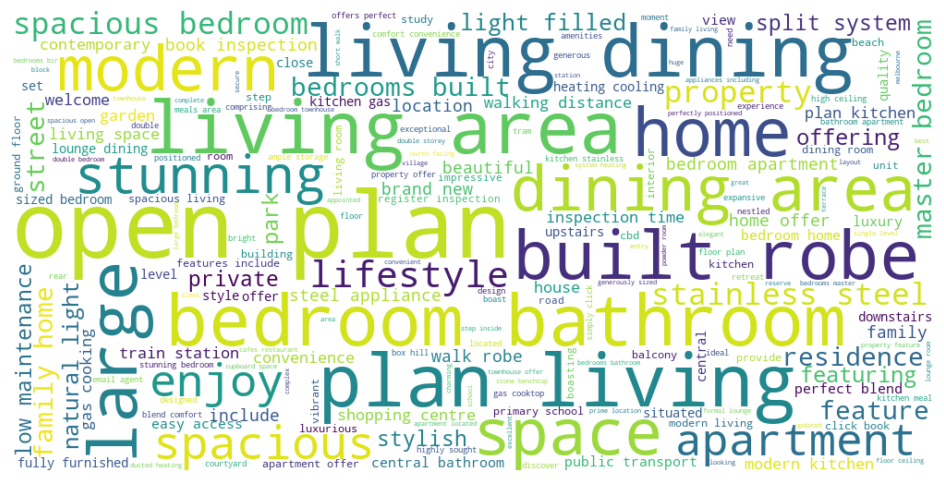

In [242]:
all_words = ' '.join([' '.join(tokens) for tokens in expensive['Cleaned_Tokens']])
wordcloud = WordCloud(
    width=1000, height=500, 
    background_color='white', 
    max_words=200, 
    max_font_size=100, 
).generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [243]:
cheap = data_cleaned.loc[data_cleaned['Rent_Price'] <= Q3]
cheap.head(5)

URL  Rent_Price  \
1  https://www.domain.com.au/421-422-collins-stre...       475.0   
3  https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4  https://www.domain.com.au/17-17-macquarie-stre...       330.0   
5  https://www.domain.com.au/18-winterfell-rd-cha...       520.0   
6  https://www.domain.com.au/517-90-buckley-stree...       520.0   

                                      Address  Bedrooms  Bathrooms Parking  \
1  421/422 Collins Street, Melbourne VIC 3000         1          1       −   
3        16/19 Mercer Road, Armadale VIC 3143         2          1       1   
4    17/17 Macquarie Street, Prahran VIC 3181         1          1       −   
5       18 Winterfell Rd, Charlemont VIC 3217         4          2       2   
6   517/90 Buckley Street, Footscray VIC 3011         2          2       1   

             Property_Type   Latitude   Longitude  \
1  Apartment / Unit / Flat -37.817097  144.960149   
3  Apartment / Unit / Flat -37.854299  145.026183   
4  Apartment / Unit / Flat -37.850524  144.992198   
5                    House -38.213421  144.362682   
6  Apartment / Unit / Flat -37.803420  144.894434   

                                  Property_Headline  ... SA2_CODE21  \
1         Light, bright and in unbeatable location!  ...  206041505   
3     Leafy Surrounds in a Central Lifestyle Locale  ...  206061135   
4          Stylish Student Accommodation in Prahran  ...  206061136   
5                   SPACIOUS HOME IN POPULAR ESTATE  ...  203021485   
6  CONTEMPORARY APARTMENT LIVING - CENTRAL LOCATION  ...  213031348   

             SA2_NAME21 AREASQKM21  \
1  Melbourne CBD - West     1.0051   
3              Armadale     2.1835   
4     Prahran - Windsor     2.9053   
5            Charlemont    18.1166   
6             Footscray     4.9671   

                                          LOCI_URI21  \
1  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
3  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
4  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
5  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
6  http://linked.data.gov.au/dataset/asgsed3/SA2/...   

                                     suburb_geometry  Distance_Bin  \
1  POLYGON ((144.95280 -37.81610, 144.95235 -37.8...        0-5 km   
3  POLYGON ((145.01167 -37.85357, 145.01177 -37.8...       5-10 km   
4  POLYGON ((145.00717 -37.84860, 145.00744 -37.8...       5-10 km   
5  POLYGON ((144.35062 -38.20606, 144.35128 -38.2...        50+ km   
6  POLYGON ((144.88310 -37.78859, 144.88323 -37.7...       5-10 km   

   Duration_Bin Distance_to_Nearest_Station_km  StationDist_Bin  \
1      0-20 min                       0.777577    0.03-50.03 km   
3      0-20 min                       0.821527    0.03-50.03 km   
4      0-20 min                       0.296351    0.03-50.03 km   
5     60-80 min                      55.451513  50.03-100.03 km   
6      0-20 min                       0.354055    0.03-50.03 km   

                                      Cleaned_Tokens  
1  [golden, opportunity, sure, delight, seeking, ...  
3  [spacious, secure, bedroom, apartment, need, s...  
4  [open, inspection, refer, unit, c, situated, h...  
5  [master, bedroom, featuring, walk, robe, ensui...  
6  [use, intercom, access, inspection, modern, ki...  

[5 rows x 27 columns]

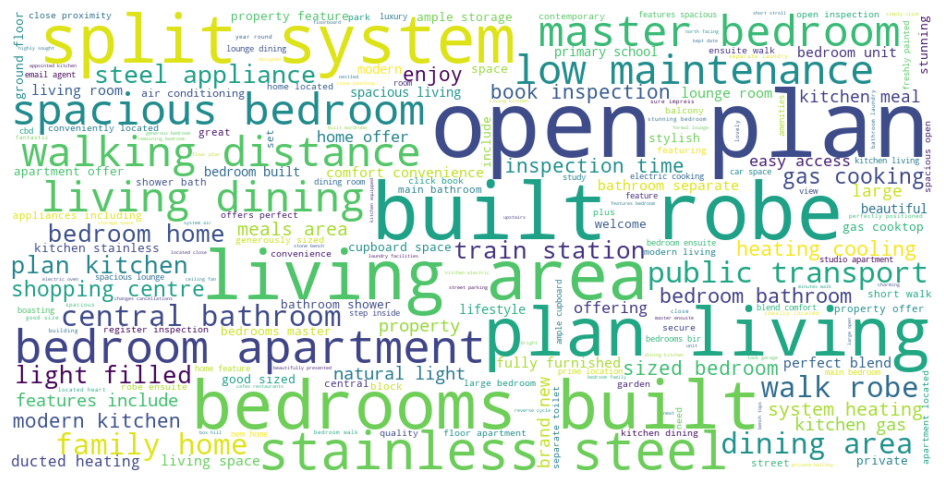

In [244]:
all_cheapwords = ' '.join([' '.join(tokens) for tokens in cheap['Cleaned_Tokens']])
wordcloud = WordCloud(
    width=1000, height=500, 
    background_color='white', 
    max_words=200, 
    max_font_size=100, 
).generate(all_cheapwords)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_cleaned['Cleaned_Text'] = data_cleaned['Cleaned_Tokens'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer(max_features=500)

tfidf_matrix = tfidf.fit_transform(data_cleaned['Cleaned_Text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())

   abundance  access  accommodation  added  additional  adjoining  agent  \
0   0.000000     0.0            0.0    0.0         0.0        0.0    0.0   
1   0.000000     0.0            0.0    0.0         0.0        0.0    0.0   
2   0.000000     0.0            0.0    0.0         0.0        0.0    0.0   
3   0.231752     0.0            0.0    0.0         0.0        0.0    0.0   
4   0.000000     0.0            0.0    0.0         0.0        0.0    0.0   

        air  airy  alfresco  ...  werribee  west      wide  windows  wir  \
0  0.000000   0.0       0.0  ...       0.0   0.0  0.000000      0.0  0.0   
1  0.000000   0.0       0.0  ...       0.0   0.0  0.000000      0.0  0.0   
2  0.185058   0.0       0.0  ...       0.0   0.0  0.255912      0.0  0.0   
3  0.000000   0.0       0.0  ...       0.0   0.0  0.000000      0.0  0.0   
4  0.000000   0.0       0.0  ...       0.0   0.0  0.309902      0.0  0.0   

   wonderful  yard  yarra  year  zone  
0        0.0   0.0    0.0   0.0   0.0  
1     

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [246]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
data_cleaned['Sentiment'] = data_cleaned['Cleaned_Text'].apply(get_sentiment)

print(data_cleaned[['Property_Description', 'Sentiment']].head())

                                Property_Description  Sentiment
0  Phone Enquiry ID: 225181 This renovated Victor...   0.209004
1  What a golden opportunity sure to delight thos...   0.271238
2  Superb 3-bedroom spacious apartment with excel...   0.274026
3  This spacious and secure two bedroom apartment...   0.265833
4  Open for Inspection: Please refer to http://sh...   0.147273


/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
px.scatter(data_cleaned, x= 'Sentiment', y = "Rent_Price")

In [248]:
correlation_sent = data_cleaned['Sentiment'].corr(data_cleaned['Rent_Price'])
print(correlation_sent)

0.13314837270171145


### LDA for headline

In [249]:
data_cleaned['Property_Headline'] = data_cleaned['Property_Headline'].astype(str)
data_cleaned['Cleaned_HLTokens'] = data_cleaned['Property_Headline'].apply(clean_and_tokenize_spacy)

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Toorak Apartment with Front Yard. Unlimited WIFI & Netflix, Fully Furnished.
Light, bright and in unbeatable location!
SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POOL & GYM
Leafy Surrounds in a Central Lifestyle Locale
Stylish Student Accommodation in Prahran
SPACIOUS HOME IN POPULAR ESTATE
CONTEMPORARY APARTMENT LIVING - CENTRAL LOCATION
The Bay, The Bars, The Lifestyle
B-Central Apartments - Student Accommodation Caulfield
Two Bedroom Apartment with Plenty of in Building Amenities
Luxurious low maintenance living
FAMILY HOME IN POPULAR ESTATE
Brand New Luxurious Double Storey House With Large Balcony
BRAND NEW FOUR BEDROOM HOME IN BONSHAW ESTATE
Low Maintenance Modern Living
Fully Furnished 4 Bedroom House
Location Location Location!
Southbank's Luxury and Location in Bella Apartments With A View!  Furnished!
Exceptional 3 Bedroom Apartment In Highly Sought After Location
THREE BEDROOM FAMILY HOME SEBASTOPOL
Superb Location
Spacious One Bedroom Apartment at the Heart of Docklands!
PL

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [250]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(data_cleaned['Cleaned_HLTokens'])
corpus = [dictionary.doc2bow(text) for text in data_cleaned['Cleaned_HLTokens']]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.113*"location" + 0.048*"prime" + 0.036*"neat" + 0.033*"perfect" + 0.031*"register"')
(1, '0.097*"bedroom" + 0.059*"home" + 0.058*"spacious" + 0.057*"modern" + 0.047*"family"')
(2, '0.052*"apartment" + 0.043*"bright" + 0.038*"included" + 0.035*"best" + 0.031*"water"')
(3, '0.097*"furnished" + 0.056*"living" + 0.047*"apartment" + 0.043*"city" + 0.036*"fully"')
(4, '0.106*"home" + 0.076*"bedroom" + 0.056*"new" + 0.047*"brand" + 0.046*"family"')


In [251]:
data_cleaned

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
10982  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
10983  https://www.domain.com.au/10-109-manningham-st...       690.0   
10984  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
10985  https://www.domain.com.au/89-axford-boulevard-...       620.0   
10986  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address  Bedrooms  Bathrooms  \
0           14/70 Canterbury Road, Toorak VIC 3142         1          1   
1       421/422 Collins Street, Melbourne VIC 3000         1          1   
2      8/1068 Lygon Street, Carlton North VIC 3054         3          2   
3             16/19 Mercer Road, Armadale VIC 3143         2          1   
4         17/17 Macquarie Street, Prahran VIC 3181         1          1   
...                                            ...       ...        ...   
10982     10 MacKinnon Court, Keysborough VIC 3173         4          2   
10983     10 109 Manningham St, Parkville VIC 3052         2          2   
10984                  2 Owl Road, Doreen VIC 3754         3          2   
10985        89 AXFORD BOULEVARD, Wodonga VIC 3690         4          2   
10986      339 Francis Street, Yarraville VIC 3013         2          3   

      Parking            Property_Type   Latitude   Longitude  \
0           −  Apartment / Unit / Flat -37.842459  145.010802   
1           −  Apartment / Unit / Flat -37.817097  144.960149   
2           2  Apartment / Unit / Flat -37.780942  144.970534   
3           1  Apartment / Unit / Flat -37.854299  145.026183   
4           −  Apartment / Unit / Flat -37.850524  144.992198   
...       ...                      ...        ...         ...   
10982       2                    House -37.986130  145.162072   
10983       1  Apartment / Unit / Flat -37.784396  144.940760   
10984       1                    House -37.581650  145.127647   
10985       2                    House -36.144063  146.900768   
10986       1                Townhouse -37.819221  144.870758   

                                       Property_Headline  ...  \
0      Toorak Apartment with Front Yard. Unlimited WI...  ...   
1              Light, bright and in unbeatable location!  ...   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...   
3          Leafy Surrounds in a Central Lifestyle Locale  ...   
4               Stylish Student Accommodation in Prahran  ...   
...                                                  ...  ...   
10982                          4 BEDROOM 2 BATHROOM HOME  ...   
10983  Park-side living |High-speed Wi-Fi |Pet Friend...  ...   
10984                           turn the key and move in  ...   
10985                               STUNNING FAMILY HOME  ...   
10986             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY  ...   

                                              LOCI_URI21  \
0      http://linked.data.gov.au/dataset/asgsed3/SA2/...   
1      http://linked.data.gov.au/dataset/asgsed3/SA2/...   
2      http://linked.data.gov.au/dataset/asgsed3/SA2/...   
3      http://linked.data.gov.au/dataset/asgsed3/SA2/...   
4      http://linked.data.gov.au/dataset/asgsed3/SA2/...   
...                                                  ...   
10982  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
10983  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
10984  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
10985  http://linked.data.gov.au/dataset/asgsed3/SA2/...   
10986  http://linked.data.gov.au/dataset/asgsed3/SA2/...   

    

In [252]:
topic_labels = {
    0: "Family Homes in Prime Locations",
    1: "Beautiful, Convenient Family Homes",
    2: "Modern, Low-Maintenance Apartments",
    3: "Stunning Furnished Apartments/Townhouses",
    4: "Central Units for Lease"
}

data_cleaned['Dominant_Topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(corpus))]

data_cleaned['Dominant_Topic_Label'] = data_cleaned['Dominant_Topic'].map(topic_labels)

print(data_cleaned[['Property_Headline', 'Dominant_Topic_Label']].head())

                                   Property_Headline  \
0  Toorak Apartment with Front Yard. Unlimited WI...   
1          Light, bright and in unbeatable location!   
2  SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...   
3      Leafy Surrounds in a Central Lifestyle Locale   
4           Stylish Student Accommodation in Prahran   

                       Dominant_Topic_Label  
0        Beautiful, Convenient Family Homes  
1        Modern, Low-Maintenance Apartments  
2        Modern, Low-Maintenance Apartments  
3           Family Homes in Prime Locations  
4  Stunning Furnished Apartments/Townhouses  


/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/tinas/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:
data_cleaned

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
10982  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
10983  https://www.domain.com.au/10-109-manningham-st...       690.0   
10984  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
10985  https://www.domain.com.au/89-axford-boulevard-...       620.0   
10986  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address  Bedrooms  Bathrooms  \
0           14/70 Canterbury Road, Toorak VIC 3142         1          1   
1       421/422 Collins Street, Melbourne VIC 3000         1          1   
2      8/1068 Lygon Street, Carlton North VIC 3054         3          2   
3             16/19 Mercer Road, Armadale VIC 3143         2          1   
4         17/17 Macquarie Street, Prahran VIC 3181         1          1   
...                                            ...       ...        ...   
10982     10 MacKinnon Court, Keysborough VIC 3173         4          2   
10983     10 109 Manningham St, Parkville VIC 3052         2          2   
10984                  2 Owl Road, Doreen VIC 3754         3          2   
10985        89 AXFORD BOULEVARD, Wodonga VIC 3690         4          2   
10986      339 Francis Street, Yarraville VIC 3013         2          3   

      Parking            Property_Type   Latitude   Longitude  \
0           −  Apartment / Unit / Flat -37.842459  145.010802   
1           −  Apartment / Unit / Flat -37.817097  144.960149   
2           2  Apartment / Unit / Flat -37.780942  144.970534   
3           1  Apartment / Unit / Flat -37.854299  145.026183   
4           −  Apartment / Unit / Flat -37.850524  144.992198   
...       ...                      ...        ...         ...   
10982       2                    House -37.986130  145.162072   
10983       1  Apartment / Unit / Flat -37.784396  144.940760   
10984       1                    House -37.581650  145.127647   
10985       2                    House -36.144063  146.900768   
10986       1                Townhouse -37.819221  144.870758   

                                       Property_Headline  ... Distance_Bin  \
0      Toorak Apartment with Front Yard. Unlimited WI...  ...      5-10 km   
1              Light, bright and in unbeatable location!  ...       0-5 km   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...       0-5 km   
3          Leafy Surrounds in a Central Lifestyle Locale  ...      5-10 km   
4               Stylish Student Accommodation in Prahran  ...      5-10 km   
...                                                  ...  ...          ...   
10982                          4 BEDROOM 2 BATHROOM HOME  ...     30-50 km   
10983  Park-side living |High-speed Wi-Fi |Pet Friend...  ...       0-5 km   
10984                           turn the key and move in  ...     30-50 km   
10985                               STUNNING FAMILY HOME  ...          NaN   
10986             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY  ...     10-15 km   

      Duration_Bin Distance_to_Nearest_Station_km   StationDist_Bin  \
0         0-20 min                       1.009717     0.03-50.03 km   
1         0-20 min                       0.777577     0.03-50.03 km   
2         0-20 min                       1.560109     0.03-50.03 km   
3         0-20 min                       0.821527     0.03-50.03 km   
4         0-20 min                       0.296351     0.03-50.03 km   
...            ...                            ...               ...   
10982    40-60 min                       3.178492     0.03-50.03 km   
1

In [254]:
topic_distribution = data_cleaned['Dominant_Topic_Label'].value_counts().reset_index()
topic_distribution.columns = ['Topic', 'Count']
fig = px.bar(topic_distribution, x='Topic', y='Count', title="Topic Distribution")
fig.show()


In [255]:
anova_result = stats.f_oneway(*[group['Rent_Price'].values for name, group in data_cleaned.groupby('Dominant_Topic_Label')])
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 3.83717772628594, p-value: 0.004048278650822489


In [256]:
data_cleaned

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
10982  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
10983  https://www.domain.com.au/10-109-manningham-st...       690.0   
10984  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
10985  https://www.domain.com.au/89-axford-boulevard-...       620.0   
10986  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address  Bedrooms  Bathrooms  \
0           14/70 Canterbury Road, Toorak VIC 3142         1          1   
1       421/422 Collins Street, Melbourne VIC 3000         1          1   
2      8/1068 Lygon Street, Carlton North VIC 3054         3          2   
3             16/19 Mercer Road, Armadale VIC 3143         2          1   
4         17/17 Macquarie Street, Prahran VIC 3181         1          1   
...                                            ...       ...        ...   
10982     10 MacKinnon Court, Keysborough VIC 3173         4          2   
10983     10 109 Manningham St, Parkville VIC 3052         2          2   
10984                  2 Owl Road, Doreen VIC 3754         3          2   
10985        89 AXFORD BOULEVARD, Wodonga VIC 3690         4          2   
10986      339 Francis Street, Yarraville VIC 3013         2          3   

      Parking            Property_Type   Latitude   Longitude  \
0           −  Apartment / Unit / Flat -37.842459  145.010802   
1           −  Apartment / Unit / Flat -37.817097  144.960149   
2           2  Apartment / Unit / Flat -37.780942  144.970534   
3           1  Apartment / Unit / Flat -37.854299  145.026183   
4           −  Apartment / Unit / Flat -37.850524  144.992198   
...       ...                      ...        ...         ...   
10982       2                    House -37.986130  145.162072   
10983       1  Apartment / Unit / Flat -37.784396  144.940760   
10984       1                    House -37.581650  145.127647   
10985       2                    House -36.144063  146.900768   
10986       1                Townhouse -37.819221  144.870758   

                                       Property_Headline  ... Distance_Bin  \
0      Toorak Apartment with Front Yard. Unlimited WI...  ...      5-10 km   
1              Light, bright and in unbeatable location!  ...       0-5 km   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...       0-5 km   
3          Leafy Surrounds in a Central Lifestyle Locale  ...      5-10 km   
4               Stylish Student Accommodation in Prahran  ...      5-10 km   
...                                                  ...  ...          ...   
10982                          4 BEDROOM 2 BATHROOM HOME  ...     30-50 km   
10983  Park-side living |High-speed Wi-Fi |Pet Friend...  ...       0-5 km   
10984                           turn the key and move in  ...     30-50 km   
10985                               STUNNING FAMILY HOME  ...          NaN   
10986             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY  ...     10-15 km   

      Duration_Bin Distance_to_Nearest_Station_km   StationDist_Bin  \
0         0-20 min                       1.009717     0.03-50.03 km   
1         0-20 min                       0.777577     0.03-50.03 km   
2         0-20 min                       1.560109     0.03-50.03 km   
3         0-20 min                       0.821527     0.03-50.03 km   
4         0-20 min                       0.296351     0.03-50.03 km   
...            ...                            ...               ...   
10982    40-60 min                       3.178492     0.03-50.03 km   
1

### BERT (desc)

In [257]:
# BERT_categorised = pd.read_csv("../data/curated/categorised.csv").drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
# BERT_categorised
# des_cat = BERT_categorised.groupby('Category')['Rent_Price'].mean().reset_index()
# fig = px.bar(des_cat, x="Category", y="Rent_Price", 
#              title="Average Rent Price by Distance to Descriptions Category",
#              labels={'Rent_Price': 'Average Rent Price ($)', 'StationDist_Bin': 'Descriptions Category'})

# fig.show()
# anova_result = stats.f_oneway(*[group['Rent_Price'].values for name, group in BERT_categorised.groupby('Category')])
# print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

In [259]:
import torch
from transformers import AutoTokenizer, BertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-yelp-polarity")
model = BertForSequenceClassification.from_pretrained(
    "textattack/bert-base-uncased-yelp-polarity", problem_type="multi_label_classification"
)

descriptions = data_cleaned['Cleaned_Text']
model.eval()

num_labels = len(model.config.id2label)
model.config.num_labels = num_labels

losses = []
predicitons =[]
labels_all = []
for desc in descriptions:
    inputs = tokenizer(desc, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_ids = torch.arange(0, logits.shape[-1])[torch.sigmoid(logits).squeeze(dim=0) > 0.5]

    labels = torch.sum(
        torch.nn.functional.one_hot(predicted_class_ids[None, :].clone(), num_classes=num_labels), dim=1
    ).to(torch.float)

    model.train()


    loss = model(**inputs, labels=labels).loss

    losses.append(loss.item())
    labels_all.append(labels)
    predicitons.append(predicted_class_ids)

mean_loss = sum(losses) / len(losses)

print(f"Mean Loss: {mean_loss}")

predicitons
type(labels_all)
flattened_predictions = [tensor.flatten().tolist() for tensor in labels_all]

predictions_df = pd.DataFrame(flattened_predictions, columns=["negative_class", "positive_class"])



/Users/tinas/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Mean Loss: 0.08096276518572133


In [ ]:
print(predictions_df['negative_class'].sum())
print(predictions_df['positive_class'].sum())

591.0
9403.0


In [271]:
predictions_df = predictions_df.reset_index(drop=True)
data_cleaned = data_cleaned.reset_index(drop=True)

In [272]:
input_data = pd.concat([data_cleaned, predictions_df], axis=1)
input_data

URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
10013  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
10014  https://www.domain.com.au/10-109-manningham-st...       690.0   
10015  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
10016  https://www.domain.com.au/89-axford-boulevard-...       620.0   
10017  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address  Bedrooms  Bathrooms  \
0           14/70 Canterbury Road, Toorak VIC 3142         1          1   
1       421/422 Collins Street, Melbourne VIC 3000         1          1   
2      8/1068 Lygon Street, Carlton North VIC 3054         3          2   
3             16/19 Mercer Road, Armadale VIC 3143         2          1   
4         17/17 Macquarie Street, Prahran VIC 3181         1          1   
...                                            ...       ...        ...   
10013     10 MacKinnon Court, Keysborough VIC 3173         4          2   
10014     10 109 Manningham St, Parkville VIC 3052         2          2   
10015                  2 Owl Road, Doreen VIC 3754         3          2   
10016        89 AXFORD BOULEVARD, Wodonga VIC 3690         4          2   
10017      339 Francis Street, Yarraville VIC 3013         2          3   

      Parking            Property_Type   Latitude   Longitude  \
0           −  Apartment / Unit / Flat -37.842459  145.010802   
1           −  Apartment / Unit / Flat -37.817097  144.960149   
2           2  Apartment / Unit / Flat -37.780942  144.970534   
3           1  Apartment / Unit / Flat -37.854299  145.026183   
4           −  Apartment / Unit / Flat -37.850524  144.992198   
...       ...                      ...        ...         ...   
10013       2                    House -37.986130  145.162072   
10014       1  Apartment / Unit / Flat -37.784396  144.940760   
10015       1                    House -37.581650  145.127647   
10016       2                    House -36.144063  146.900768   
10017       1                Townhouse -37.819221  144.870758   

                                       Property_Headline  ...  \
0      Toorak Apartment with Front Yard. Unlimited WI...  ...   
1              Light, bright and in unbeatable location!  ...   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...   
3          Leafy Surrounds in a Central Lifestyle Locale  ...   
4               Stylish Student Accommodation in Prahran  ...   
...                                                  ...  ...   
10013                          4 BEDROOM 2 BATHROOM HOME  ...   
10014  Park-side living |High-speed Wi-Fi |Pet Friend...  ...   
10015                           turn the key and move in  ...   
10016                               STUNNING FAMILY HOME  ...   
10017             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY  ...   

        StationDist_Bin                                     Cleaned_Tokens  \
0         0.03-50.03 km  [phone, enquiry, d, renovated, victorian, styl...   
1         0.03-50.03 km  [golden, opportunity, sure, delight, seeking, ...   
2         0.03-50.03 km  [superb, bedroom, spacious, apartment, excelle...   
3         0.03-50.03 km  [spacious, secure, bedroom, apartment, need, s...   
4         0.03-50.03 km  [open, inspection, refer, unit, c, situated, h...   
...                 ...                                                ...   
10013     0.03-50.03 km  [barry, plant, award, winning, property, manag...   
10014     0.03-50.03 km  [uko, royal, park, discover, premium, living, ...   
10015     0.03-50.03 km

In [273]:
input_data = gpd.GeoDataFrame(input_data, 
                                geometry=gpd.points_from_xy(input_data['Longitude'], input_data['Latitude']), 
                                crs="EPSG:4326")

input_data = input_data.to_crs(epsg=3857)

input_data['geometr_2km'] = input_data['geometry'].buffer(2000)
input_data = input_data.to_crs(epsg=3857)
input_data = input_data.set_geometry('geometr_2km')

input_data


URL  Rent_Price  \
0      https://www.domain.com.au/14-70-canterbury-roa...       790.0   
1      https://www.domain.com.au/421-422-collins-stre...       475.0   
2      https://www.domain.com.au/8-1068-lygon-street-...       730.0   
3      https://www.domain.com.au/16-19-mercer-road-ar...       625.0   
4      https://www.domain.com.au/17-17-macquarie-stre...       330.0   
...                                                  ...         ...   
10013  https://www.domain.com.au/10-mackinnon-court-k...       650.0   
10014  https://www.domain.com.au/10-109-manningham-st...       690.0   
10015  https://www.domain.com.au/2-owl-road-doreen-vi...       480.0   
10016  https://www.domain.com.au/89-axford-boulevard-...       620.0   
10017  https://www.domain.com.au/339-francis-street-y...       695.0   

                                           Address  Bedrooms  Bathrooms  \
0           14/70 Canterbury Road, Toorak VIC 3142         1          1   
1       421/422 Collins Street, Melbourne VIC 3000         1          1   
2      8/1068 Lygon Street, Carlton North VIC 3054         3          2   
3             16/19 Mercer Road, Armadale VIC 3143         2          1   
4         17/17 Macquarie Street, Prahran VIC 3181         1          1   
...                                            ...       ...        ...   
10013     10 MacKinnon Court, Keysborough VIC 3173         4          2   
10014     10 109 Manningham St, Parkville VIC 3052         2          2   
10015                  2 Owl Road, Doreen VIC 3754         3          2   
10016        89 AXFORD BOULEVARD, Wodonga VIC 3690         4          2   
10017      339 Francis Street, Yarraville VIC 3013         2          3   

      Parking            Property_Type   Latitude   Longitude  \
0           −  Apartment / Unit / Flat -37.842459  145.010802   
1           −  Apartment / Unit / Flat -37.817097  144.960149   
2           2  Apartment / Unit / Flat -37.780942  144.970534   
3           1  Apartment / Unit / Flat -37.854299  145.026183   
4           −  Apartment / Unit / Flat -37.850524  144.992198   
...       ...                      ...        ...         ...   
10013       2                    House -37.986130  145.162072   
10014       1  Apartment / Unit / Flat -37.784396  144.940760   
10015       1                    House -37.581650  145.127647   
10016       2                    House -36.144063  146.900768   
10017       1                Townhouse -37.819221  144.870758   

                                       Property_Headline  ...  \
0      Toorak Apartment with Front Yard. Unlimited WI...  ...   
1              Light, bright and in unbeatable location!  ...   
2      SPACIOUS 3 BEDROOM APARTMENT, 2 BATHROOMS, POO...  ...   
3          Leafy Surrounds in a Central Lifestyle Locale  ...   
4               Stylish Student Accommodation in Prahran  ...   
...                                                  ...  ...   
10013                          4 BEDROOM 2 BATHROOM HOME  ...   
10014  Park-side living |High-speed Wi-Fi |Pet Friend...  ...   
10015                           turn the key and move in  ...   
10016                               STUNNING FAMILY HOME  ...   
10017             LARGE 2 BEDROOM, 3 BATHROOM PLUS STUDY  ...   

        StationDist_Bin                                     Cleaned_Tokens  \
0         0.03-50.03 km  [phone, enquiry, d, renovated, victorian, styl...   
1         0.03-50.03 km  [golden, opportunity, sure, delight, seeking, ...   
2         0.03-50.03 km  [superb, bedroom, spacious, apartment, excelle...   
3         0.03-50.03 km  [spacious, secure, bedroom, apartment, need, s...   
4         0.03-50.03 km  [open, inspection, refer, unit, c, situated, h...   
...                 ...                                                ...   
10013     0.03-50.03 km  [barry, plant, award, winning, property, manag...   
10014     0.03-50.03 km  [uko, royal, park, discover, premium, living, ...   
10015     0.03-50.03 km

In [274]:
input_data = input_data[['URL','Rent_Price', 'Bedrooms', 'Bathrooms', 'Parking','Property_Type', 'Street', 'Suburb', 'Postcode', 'Distance_to_Nearest_Station_km',  'Cleaned_Text',
       'Sentiment','Cleaned_HLTokens', 'Dominant_Topic','Dominant_Topic_Label', 'negative_class', 'positive_class', 'geometr_2km']]

In [275]:
input_data.to_csv("../data/curated/input_df.csv", index=False)